In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob

['/Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard01.jpg', '/Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard02.jpg', '/Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard03.jpg', '/Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard04.jpg', '/Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard05.jpg', '/Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard06.jpg', '/Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard07.jpg', '/Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard08.jpg', '/Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard09.jpg', '/Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard10.jpg', '/Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard11.jpg', '/Users/mars/Documents/02-KCL/Year_4/7_SAP

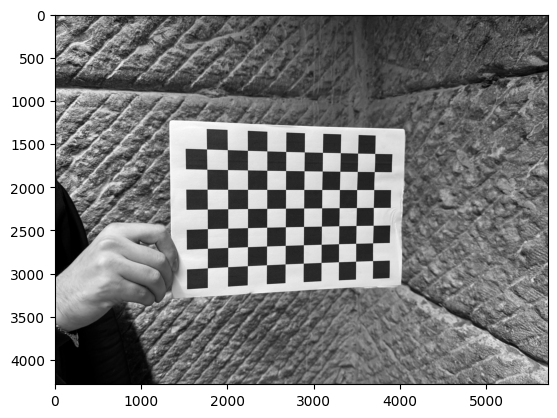

In [18]:
images = sorted(glob.glob('/Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard??.jpg'))
print(images)

img = cv.imread(images[0]) # Extract the first image as img
print(img.shape)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convert to a gray scale image
print(img.shape, gray.shape)
plt.imshow(gray, cmap='gray'); # Visualize gray

(70, 1, 2)
(70, 2)
[[3683.5059 2860.3403]
 [3487.6716 2866.4604]
 [3288.9292 2873.4385]
 [3087.1245 2881.4868]
 [2881.4382 2889.5583]]
True


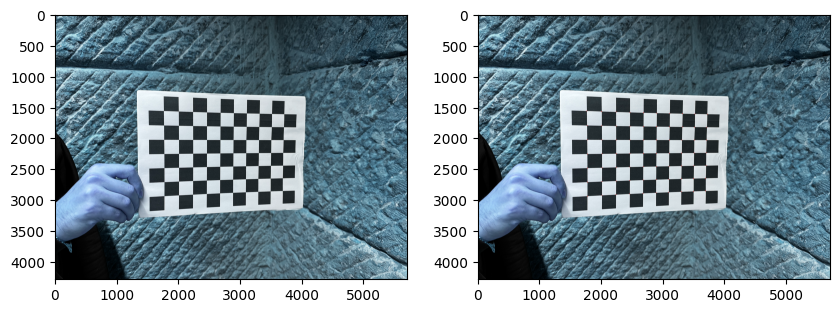

In [19]:
retval, corners = cv.findChessboardCorners(image=gray, patternSize=(10,7))
print(corners.shape)
corners = np.squeeze(corners) # Get rid of extraneous singleton dimension
print(corners.shape)
print(corners[:5])  #Examine the first few rows of corners
print(retval)

img2 = np.copy(img)  # Make a copy of original img as img2

# Add circles to img2 at each corner identified
for corner in corners:
    coord = (int(corner[0]), int(corner[1]))
    cv.circle(img=img2, center=coord, radius=5, color=(255, 0, 0), thickness=2)

# Produce a figure with the original image img in one subplot and modified image img2 (with the corners added in).
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img2);

In [20]:
# Refining Corner Locations with `cv.cornerSubPix`

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001) # Set termination criteria as a tuple.
corners_orig = corners.copy()  # Preserve the original corners for comparison after
corners = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria=criteria) # extract refined corner coordinates.

# Examine how much the corners have shifted (in pixels)
shift = corners - corners_orig
print(shift[:4,:])

[[ 0.56591797 -0.43432617]
 [ 0.19116211  0.20947266]
 [ 0.13012695  0.15600586]
 [ 0.44799805 -0.01416016]]


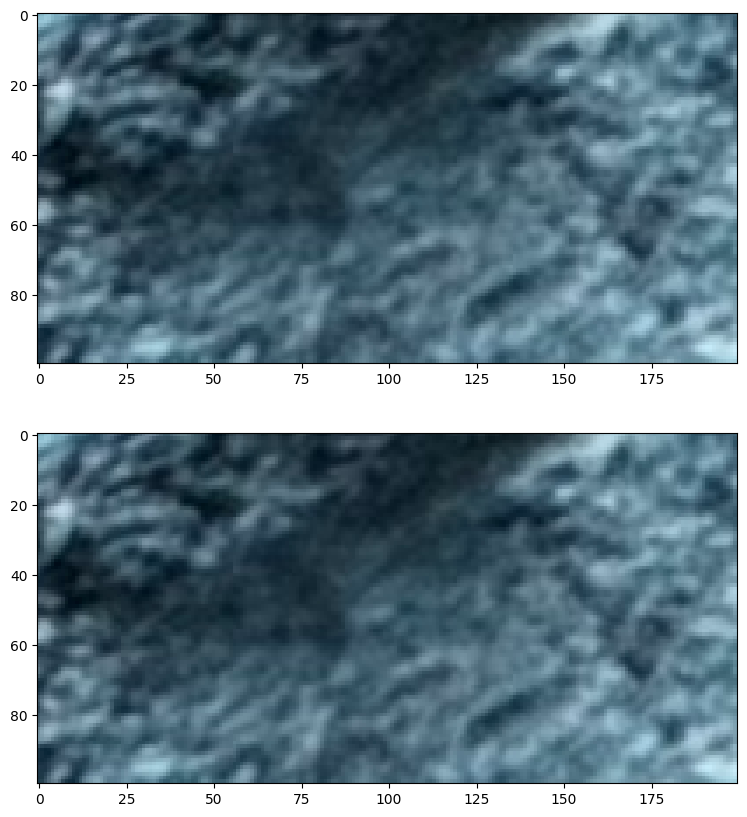

In [14]:
img3 = np.copy(img)
for corner in corners:
    coord = (int(corner[0]), int(corner[1]))
    cv.circle(img=img3, center=coord, radius=5, color=(0, 255, 0), thickness=2)

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.imshow(img2[200:300,200:400,:])
plt.subplot(212)
plt.imshow(img3[200:300,200:400,:]);

[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [8. 0. 0.]
 [9. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [7. 1. 0.]
 [8. 1. 0.]
 [9. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [7. 2. 0.]
 [8. 2. 0.]
 [9. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2. 3. 0.]
 [3. 3. 0.]
 [4. 3. 0.]
 [5. 3. 0.]
 [6. 3. 0.]
 [7. 3. 0.]
 [8. 3. 0.]
 [9. 3. 0.]
 [0. 4. 0.]
 [1. 4. 0.]
 [2. 4. 0.]
 [3. 4. 0.]
 [4. 4. 0.]
 [5. 4. 0.]
 [6. 4. 0.]
 [7. 4. 0.]
 [8. 4. 0.]
 [9. 4. 0.]
 [0. 5. 0.]
 [1. 5. 0.]
 [2. 5. 0.]
 [3. 5. 0.]
 [4. 5. 0.]
 [5. 5. 0.]
 [6. 5. 0.]
 [7. 5. 0.]
 [8. 5. 0.]
 [9. 5. 0.]
 [0. 6. 0.]
 [1. 6. 0.]
 [2. 6. 0.]
 [3. 6. 0.]
 [4. 6. 0.]
 [5. 6. 0.]
 [6. 6. 0.]
 [7. 6. 0.]
 [8. 6. 0.]
 [9. 6. 0.]]


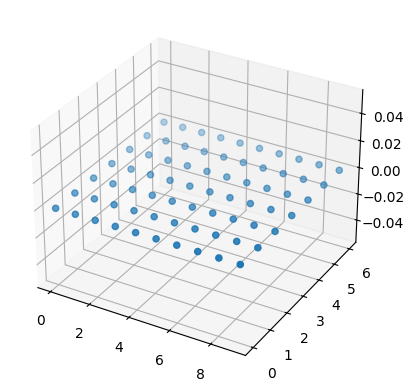

In [21]:
obj_grid = np.zeros((10*7,3), np.float32)
obj_grid[:, :2] = np.mgrid[0:10, 0:7].T.reshape(-1, 2)
print(obj_grid)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(obj_grid[:, 0], obj_grid[:, 1], obj_grid[:, 2])
plt.show()

In [22]:
# Initialize enpty list to accumulate coordinates
obj_points = [] # 3d world coordinates
img_points = [] # 2d image coordinates
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

for fname in images:
    print('Loading {}'.format(fname))
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    retval, corners = cv.findChessboardCorners(gray, (10,7))
    if retval:
        obj_points.append(obj_grid)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        img_points.append(corners2)

Loading /Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard01.jpg
Loading /Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard02.jpg
Loading /Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard03.jpg
Loading /Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard04.jpg
Loading /Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard05.jpg
Loading /Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard06.jpg
Loading /Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard07.jpg
Loading /Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard08.jpg
Loading /Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard09.jpg
Loading /Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard10.jpg
Loading /Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chess

In [23]:
retval, mtx, dist, rvecs, tvecs = cv.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)
print(retval) # Objective function value
print(mtx)    # Camera matrix
print(dist)   # Distortion coefficients

1.6787297775255017
[[4.02065345e+03 0.00000000e+00 2.87814290e+03]
 [0.00000000e+00 4.02448238e+03 2.11352590e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 0.25796285 -0.95011782 -0.00367074  0.00304755  1.08199353]]


Text(0.5, 1.0, 'Corrected')

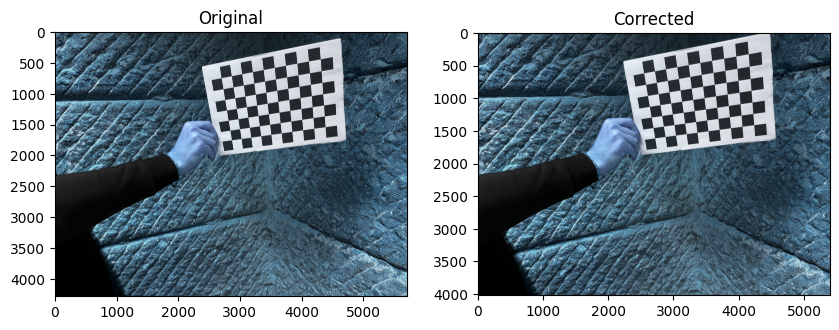

In [26]:
img = cv.imread('/Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/Chessboard14.jpg')
h,w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.subplot(122)
plt.imshow(dst)
plt.title('Corrected')

In [27]:
total_error = 0
for i in range(len(obj_points)):
    imgpoints2, _ = cv.projectPoints(obj_points[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv.norm(img_points[i], imgpoints2, cv.NORM_L2) / len(imgpoints2)
    total_error += error

mean_error = total_error / len(obj_points)
print("Mean reprojection error: ", mean_error)

Mean reprojection error:  0.18546907817048125


In [29]:
import numpy as np
import cv2 as cv
import glob

# Termination criteria for the iterative algorithm used in cornerSubPix
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ..., (6,5,0)
# Adjust the following line for different chessboard sizes
objp = np.zeros((7*10, 3), np.float32)
objp[:, :2] = np.mgrid[0:10, 0:7].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images.
obj_points = []  # 3d point in real world space
img_points = []  # 2d points in image plane.

# List of calibration images
images = glob.glob('/Users/mars/Documents/02-KCL/Year_4/7_SAP/Individual CW/Chessboard/*.jpg')

for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (10, 7), None)

    # If found, add object points, image points (after refining them)
    if ret:
        obj_points.append(objp)

        # Refine the corners and get more accurate results
        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        img_points.append(corners2)

        # Draw and display the corners
        cv.drawChessboardCorners(img, (10, 7), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)

cv.destroyAllWindows()

# Perform camera calibration to return the camera matrix, distortion coefficients, rotation and translation vectors
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)

print("Camera matrix:\n", mtx)
print("Distortion coefficients:\n", dist)
print("Rotation Vectors:\n", rvecs)
print("Translation Vectors:\n", tvecs)

# Calculate the total error of the calibration
total_error = 0
for i in range(len(obj_points)):
    img_points2, _ = cv.projectPoints(obj_points[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv.norm(img_points[i], img_points2, cv.NORM_L2)/len(img_points2)
    total_error += error

print("Total error: ", total_error/len(obj_points))


Camera matrix:
 [[4.02065345e+03 0.00000000e+00 2.87814289e+03]
 [0.00000000e+00 4.02448238e+03 2.11352590e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients:
 [[ 0.25796285 -0.95011783 -0.00367074  0.00304755  1.08199355]]
Rotation Vectors:
 (array([[ 0.26778334],
       [-0.39378396],
       [ 2.96279803]]), array([[ 0.33648834],
       [ 0.08954582],
       [-3.11816086]]), array([[ 0.72794251],
       [-0.16291714],
       [ 3.01389687]]), array([[-0.12613368],
       [ 1.31407908],
       [ 2.7311492 ]]), array([[-1.34169539],
       [ 0.1156395 ],
       [-2.79863044]]), array([[-1.12213871],
       [ 0.1298267 ],
       [-2.92517607]]), array([[-0.1293491 ],
       [ 0.71453766],
       [ 2.98567187]]), array([[-1.59470902],
       [-0.23705076],
       [ 2.51346792]]), array([[-0.55003007],
       [-0.45086539],
       [ 2.94435363]]), array([[ 0.70931803],
       [ 1.07583455],
       [-2.726708  ]]), array([[-0.51910715],
       [-0.36637928],
     